In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "None"
os.environ["XLA_PYTHON_CLIENT_PREALLOCATE"] = "false"

In [2]:
import jax.numpy as jnp
from jax import random, jit, vmap
import numpy as onp

import matplotlib.pyplot as plt
import pickle
import itertools

In [3]:
import sys
sys.path.append("..")
%load_ext autoreload

In [4]:
%autoreload 2
from ground_truth import gt_op, objective_fn, bounds, simulate

I0000 00:00:1711573699.758657   83617 tfrt_cpu_pjrt_client.cc:349] TfrtCpuClient created.
2024-03-27 17:08:19.839699: E external/xla/xla/stream_executor/cuda/cuda_driver.cc:276] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [5]:
methods = ['EI_leaky_alpha0.01_q1',
           'LCB_kappa0.1_q1',
           'LCB_kappa1.0_q1']
seeds = [0,1,2,3,4]

file_names = []
for (m, s) in itertools.product(methods, seeds):
    file_names.append('collected_datasets/dataset_150_' + m + '_seed' + str(s) + '.npz')
file_names

['collected_datasets/dataset_150_EI_leaky_alpha0.01_q1_seed0.npz',
 'collected_datasets/dataset_150_EI_leaky_alpha0.01_q1_seed1.npz',
 'collected_datasets/dataset_150_EI_leaky_alpha0.01_q1_seed2.npz',
 'collected_datasets/dataset_150_EI_leaky_alpha0.01_q1_seed3.npz',
 'collected_datasets/dataset_150_EI_leaky_alpha0.01_q1_seed4.npz',
 'collected_datasets/dataset_150_LCB_kappa0.1_q1_seed0.npz',
 'collected_datasets/dataset_150_LCB_kappa0.1_q1_seed1.npz',
 'collected_datasets/dataset_150_LCB_kappa0.1_q1_seed2.npz',
 'collected_datasets/dataset_150_LCB_kappa0.1_q1_seed3.npz',
 'collected_datasets/dataset_150_LCB_kappa0.1_q1_seed4.npz',
 'collected_datasets/dataset_150_LCB_kappa1.0_q1_seed0.npz',
 'collected_datasets/dataset_150_LCB_kappa1.0_q1_seed1.npz',
 'collected_datasets/dataset_150_LCB_kappa1.0_q1_seed2.npz',
 'collected_datasets/dataset_150_LCB_kappa1.0_q1_seed3.npz',
 'collected_datasets/dataset_150_LCB_kappa1.0_q1_seed4.npz']

In [6]:
best_so_far = 0
for file_name in file_names:
    u, _, s, _ = pickle.load(open(file_name, "rb"))
    objs = vmap(objective_fn)(s)
    if -objs.min() > best_so_far:
        best_so_far=-objs.min()
        idx_best = objs.argmin()
        u_best = u[idx_best]
        s_best = s[idx_best]
print(f"Overall best is {best_so_far}")
print(f"Best u is {u_best}")

Overall best is 2171.116943359375
Best u is [ 0.        10.        10.        10.         0.        10.
 10.        10.         3.2796695 10.         9.684575  10.
 10.        10.         9.469295  30.        30.        30.
 30.        30.        30.        30.        30.        30.
 30.        30.        30.        30.        30.        30.       ]


In [7]:
u_best.shape, s_best.shape

((30,), (2500, 2))

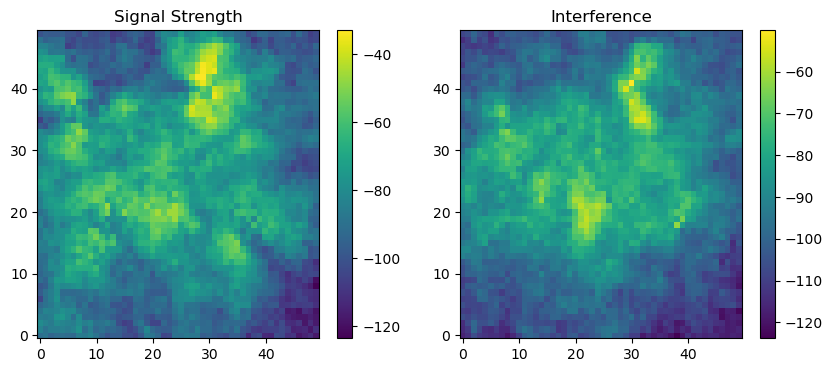

In [8]:
N_y = 50
xx, yy = jnp.meshgrid(jnp.arange(N_y), jnp.arange(N_y)) # shapes (N_y,N_y) and (N_y,N_y)

plt.figure(figsize=(10, 4))

plt.subplot(121)
#plt.imshow(s_best.reshape((N_y,N_y,2))[:,:,0])
plt.pcolor(xx, yy, s_best.reshape((N_y,N_y,2))[:,:,0])
plt.colorbar()
plt.title("Signal Strength")

plt.subplot(122)
plt.pcolor(xx, yy, s_best.reshape((N_y,N_y,2))[:,:,1])
plt.colorbar()
plt.title("Interference")


plt.savefig('best_cell_towers.png', dpi=250)
plt.show()